## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-015-07-Build-RAPTOR-Mars-01

In [1]:
import datetime
nowStart = datetime.datetime.now()

![RAPTOR-QUBE](../../images/raptorqube/raptorqube-full.bmp)

In [2]:
import os
import time
import shutil
import pandas as pd
import numpy as np

In [3]:
pathDL='../../Results/Chapter 15/999-DL/'
pathRIFInName='../../Code/Chapter 015/999-DL/100-Raw-Zone/'
pathRIFOutName='../../Results/Chapter 15/999-DL/100-Raw-Zone/'

In [4]:
if os.path.exists(pathRIFOutName):
    shutil.rmtree(pathRIFOutName)
    time.sleep(5)

In [5]:
if not os.path.exists(pathRIFOutName):
    shutil.copytree(pathRIFInName, pathRIFOutName)

![Processor](../../images/Processor.JPG)

In [6]:
pathRealDLname=os.path.realpath(pathRIFOutName)
print(pathRealDLname)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 15\999-DL\100-Raw-Zone


## Show RIF directories

In [7]:
for root, dirs, files in os.walk(pathRealDLname, topdown=True):
    for name in dirs:
        print(os.path.join(root, name))

In [8]:
for root, dirs, files in os.walk(pathRealDLname, topdown=True):
    for name in files:
        print(os.path.join(root, name))

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 15\999-DL\100-Raw-Zone\15-04-Retrieve-Mars-Hopper.csv.gz
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 15\999-DL\100-Raw-Zone\15-04-Retrieve-Mars-Mines.csv.gz
C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 15\999-DL\100-Raw-Zone\15-04-Retrieve-Mars-Time.csv.gz


![Processor](../../images/Processor.JPG)

# Retrieve

![RIF Functional Layer - Retrieve Step](../../images/RIF-FL-RET.JPG) ![Raw Zone](../../images/DL-RZ.JPG)

### Time, Person, Objects, Location & Event Retrieve Data

The mars communication system has delivered the information from mars to your Raw Zone.

That system is outside your control.

This means you have no processing needed to get the data into the RIF eco-system.

### Warning: It also means data can arrive unexpected and in changed format.
    
    

![Processor](../../images/Processor.JPG)

# Assess

![RIF Functional Layer - Retrieve Step](../../images/RIF-FL-ASS.JPG) ![Raw Zone](../../images/DL-SZ.JPG)

### Time

In [10]:
retrieveTimeName = os.path.join(pathDL, '100-Raw-Zone', '15-04-Retrieve-Mars-Time.csv.gz')
TimeDF=pd.read_csv(retrieveTimeName, header=0, encoding='utf-8', compression='gzip')

In [11]:
print(TimeDF.shape)

(1440000, 5)


In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
TimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440000 entries, 0 to 1439999
Data columns (total 5 columns):
MinutesSinceLaunch    1440000 non-null int64
SecondsSinceLaunch    1440000 non-null int64
EarthTime             1440000 non-null float64
MarsTime              1440000 non-null float64
EarthMarsGap          1440000 non-null float64
dtypes: float64(3), int64(2)
memory usage: 54.9 MB


In [18]:
TimeDF.describe()

,MinutesSinceLaunch,SecondsSinceLaunch,EarthTime,MarsTime,EarthMarsGap
count,1.440000e+06,1.440000e+06,1.440000e+06,1.440000e+06,1.440000e+06
mean,7.199995e+05,4.319997e+07,5.003239e+02,4.866231e+02,1.370079e+01
std,4.156923e+05,2.494154e+07,2.888625e+02,2.809523e+02,7.910162e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.599998e+05,2.159998e+07,2.501620e+02,2.433116e+02,6.850394e+00
50%,7.199995e+05,4.319997e+07,5.003239e+02,4.866231e+02,1.370079e+01
75%,1.079999e+06,6.479996e+07,7.504859e+02,7.299347e+02,2.055118e+01
max,1.439999e+06,8.639994e+07,1.000648e+03,9.732463e+02,2.740158e+01


In [20]:
assessTimeName = os.path.join(pathDL,'200-Structured-Zone', '15-07-Assess-Mars-Time.csv.gz')
TimeDF.to_csv(assessTimeName, index=False, encoding='utf-8', compression='gzip')
print(assessTimeName)

../../Results/Chapter 15/999-DL/200-Structured-Zone\15-07-Assess-Mars-Time.csv.gz


In [23]:
print('Assess: %d time entries' % (TimeDF.shape[0]))

Assess: 1440000 time entries


### Person

In [24]:
personDF = pd.DataFrame([
    ['Martin','Marsman','Operations Manager'],
    ['Angus','Hundfoot','VR Miner'],
    ['Jock','Mc Bite','VR Driver']
])

In [25]:
print('Assess: %d person entries' % (personDF.shape[0]))

Assess: 3 person entries


In [26]:
personDF.columns = ['Firstname', 'Lastname', 'Skills']
personDF.index.name = 'ID'

In [28]:
personDF.head()

,Firstname,Lastname,Skills
ID,,,
0,Martin,Marsman,Operations Manager
1,Angus,Hundfoot,VR Miner
2,Jock,Mc Bite,VR Driver


In [29]:
assessPersonName = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Person.csv.gz')
personDF.to_csv(assessPersonName, index=False, encoding='utf-8', compression='gzip')
print(assessPersonName)

../../Results/Chapter 15/999-DL/200-Structured-Zone\15-07-Assess-Mars-Person.csv.gz


### Objects, Events

In [30]:
retrieveObjectName = os.path.join(pathDL, '100-Raw-Zone', '15-04-Retrieve-Mars-Hopper.csv.gz')
objectDF=pd.read_csv(retrieveObjectName, header=0, encoding='utf-8', compression='gzip')

In [31]:
print('Data has %0d columns and %0d records' % (objectDF.shape[1],objectDF.shape[0]))

Data has 7 columns and 2919739 records


In [33]:
objectDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919739 entries, 0 to 2919738
Data columns (total 7 columns):
Time            float64
Event           object
ObjectHopper    object
ObjectOre       object
Tonnage         int64
LoadBayID       int64
WaitTime        float64
dtypes: float64(2), int64(2), object(3)
memory usage: 155.9+ MB


In [34]:
objectDF.describe()

,Time,Tonnage,LoadBayID,WaitTime
count,2.919739e+06,2.919739e+06,2.919739e+06,2.919739e+06
mean,1.000863e+07,5.997769e+01,2.501647e+00,1.701870e+01
std,5.779345e+06,2.339773e+01,1.118402e+00,3.660686e+01
min,0.000000e+00,2.000000e+01,1.000000e+00,7.933378e-05
25%,5.003417e+06,4.000000e+01,2.000000e+00,1.000000e-04
50%,1.000357e+07,6.000000e+01,3.000000e+00,1.000000e-04
75%,1.501119e+07,8.000000e+01,4.000000e+00,1.680835e+01
max,2.001915e+07,1.000000e+02,4.000000e+00,6.345246e+02


In [35]:
from scipy.stats import kurtosis, skew, skewtest
x=objectDF['Tonnage']

In [36]:
print( 'Excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))

Excess kurtosis of normal distribution (should be 0): -1.20104549999


In [37]:
print( 'Skewness of normal distribution (should be 0): {}'.format( skew(x) ))

Skewness of normal distribution (should be 0): 0.00205861819686


In [38]:
print( 'Skewtest : {}'.format( skewtest(x) ))

Skewtest : SkewtestResult(statistic=1.4360608846207914, pvalue=0.15098501718218116)


In [39]:
x=objectDF['WaitTime']

In [40]:
print( 'Excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))

Excess kurtosis of normal distribution (should be 0): 16.0360871591


In [41]:
print( 'Skewness of normal distribution (should be 0): {}'.format( skew(x) ))

Skewness of normal distribution (should be 0): 3.44171667159


In [42]:
print( 'Skewtest : {}'.format( skewtest(x) ))

Skewtest : SkewtestResult(statistic=1222.1037617831885, pvalue=0.0)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
t = np.array(objectDF['Tonnage'])
w = np.array(objectDF['WaitTime'])

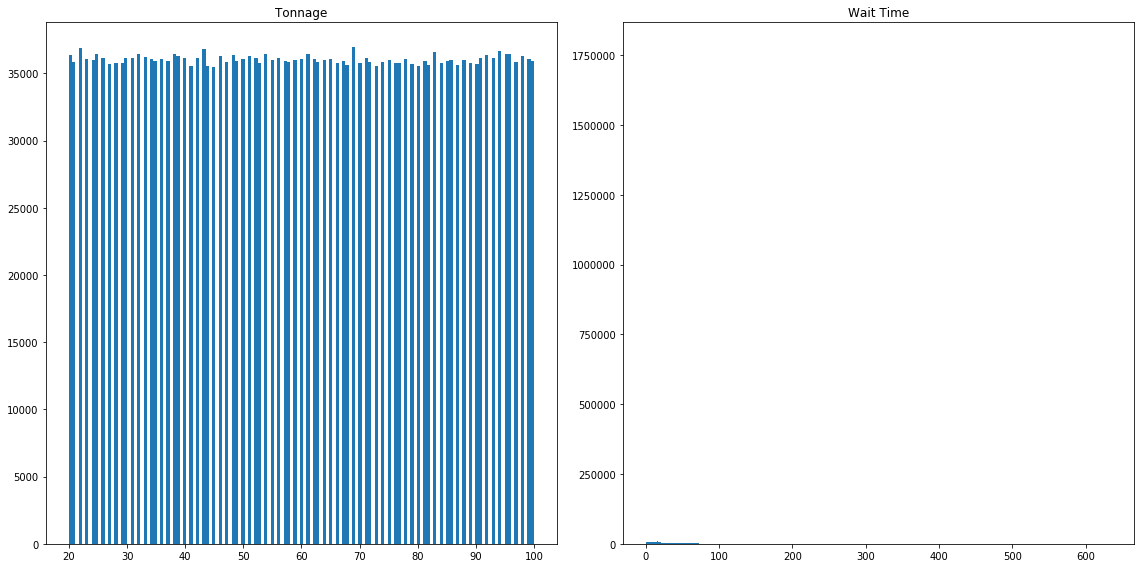

In [49]:
fig=plt.figure(figsize=(16,8))

(ax1, ax2) = fig.subplots(1, 2)

ax1.hist(t, bins='auto')
ax1.set_title('Tonnage')

ax2.hist(w, bins='auto')
ax2.set_title('Wait Time')

plt.tight_layout()
plt.show();

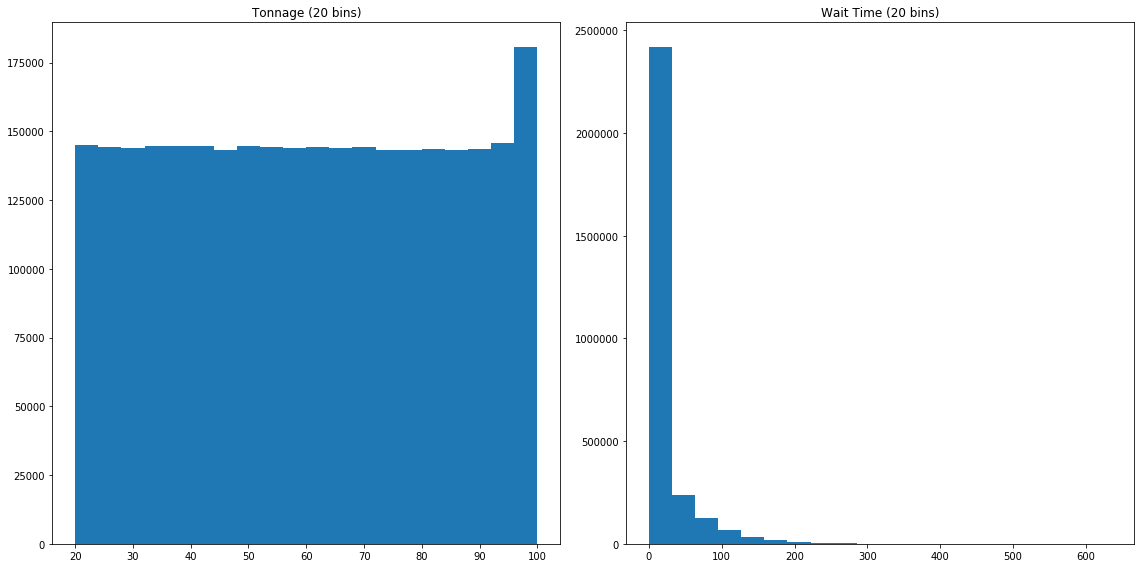

In [55]:
fig=plt.figure(figsize=(16,8))

(ax1, ax2) = fig.subplots(1, 2)
ax1.hist(t, bins=20)
ax1.set_title('Tonnage (20 bins)')

ax2.hist(w, bins=20)
ax2.set_title('Wait Time (20 bins)')

plt.tight_layout()
plt.show();

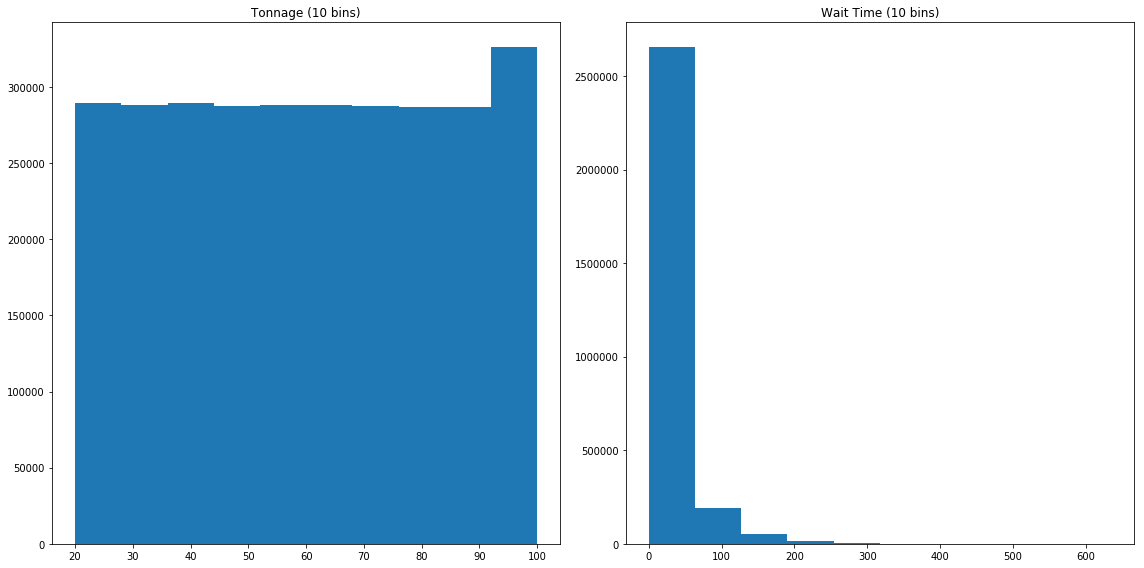

In [56]:
fig=plt.figure(figsize=(16,8))

(ax1, ax2) = fig.subplots(1, 2)
ax1.hist(t, bins=10)
ax1.set_title('Tonnage (10 bins)')

ax2.hist(w, bins=10)
ax2.set_title('Wait Time (10 bins)')

plt.tight_layout()
plt.show();

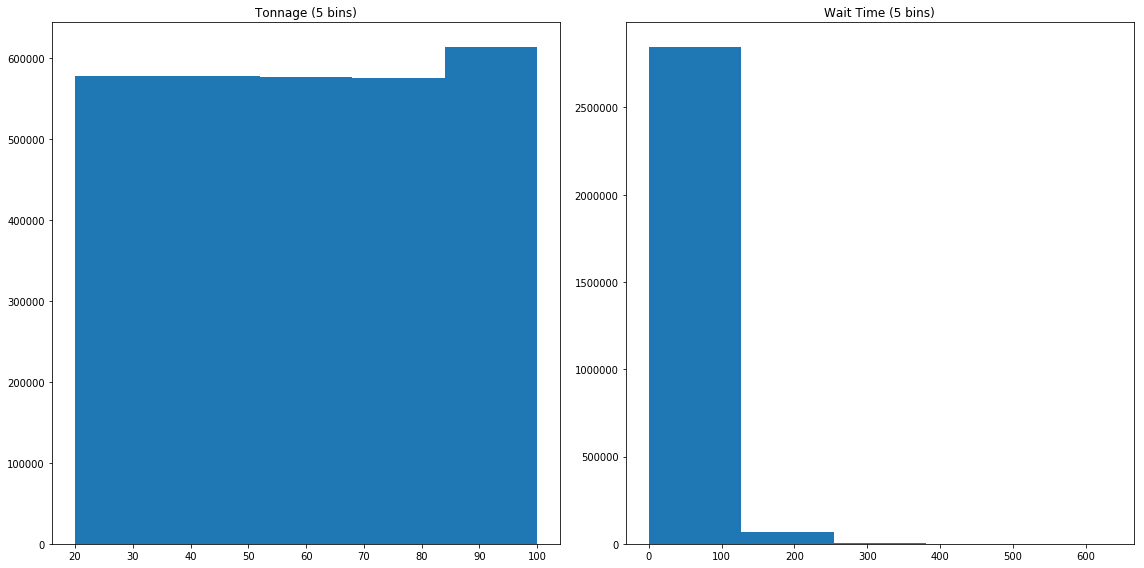

In [57]:
fig=plt.figure(figsize=(16,8))

(ax1, ax2) = fig.subplots(1, 2)
ax1.hist(t, bins=5)
ax1.set_title('Tonnage (5 bins)')

ax2.hist(w, bins=5)
ax2.set_title('Wait Time (5 bins)')

plt.tight_layout()
plt.show();

In [ ]:
objectDF

In [58]:
assessObjectName1 = os.path.join(pathDL,'200-Structured-Zone', '15-07-Assess-Mars-Mine-Delivery.csv.gz')
objectDF.to_csv(assessObjectName1, index=False, encoding='utf-8', compression='gzip')

### Object - Equipment

In [59]:
equipmentDF = pd.DataFrame([
    ['T101','Robot','Track Puller Robot'],
    ['T102','Robot','Track Puller Robot'],
    ['T103','Robot','Track Ruller Robot'],
    ['T104','Robot','Track Puller Robot'],
    ['T200','Robot','Human-in-Loop Walker Robot'],
    ['T300','Robot','6x6 Wheeled Transport Robot'],
    ['T400','Robot','Drone Scout Robot']
])

In [60]:
assessObjectName2 = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Robots.csv.gz')
equipmentDF.to_csv(assessObjectName2, index=False, encoding='utf-8', compression='gzip')
print(assessObjectName2)

../../Results/Chapter 15/999-DL/200-Structured-Zone\15-07-Assess-Mars-Robots.csv.gz


### Location

In [61]:
retrieveName = os.path.join(pathDL, '100-Raw-Zone', '15-04-Retrieve-Mars-Mines.csv.gz')
locationDF=pd.read_csv(retrieveName, header=0, encoding='utf-8', compression='gzip')

In [62]:
print('Data has %0d columns and %0d records' % (locationDF.shape[1],locationDF.shape[0]))

Data has 3 columns and 5 records


In [63]:
locationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
MineID       5 non-null int64
Longitude    5 non-null int64
Latitude     5 non-null int64
dtypes: int64(3)
memory usage: 192.0 bytes


In [65]:
locationDF.describe()

,MineID,Longitude,Latitude
count,5.000000,5.00000,5.000000
mean,2.000000,-2.00000,27.400000
std,1.581139,60.02916,44.410584
min,0.000000,-88.00000,-27.000000
25%,1.000000,-19.00000,0.000000
50%,2.000000,0.00000,19.000000
75%,3.000000,20.00000,68.000000
max,4.000000,77.00000,77.000000


In [66]:
assessName = os.path.join(pathDL,'200-Structured-Zone', '15-07-Assess-Mars-Mines-Location.csv.gz')
locationDF.to_csv(assessName, index=False, encoding='utf-8', compression='gzip')

![Processor](../../images/Processor.JPG)

# Process

![RIF Functional Layer - Process Step](../../images/RIF-FL-PRC.JPG) ![Raw Zone](../../images/DL-CUZ.JPG)

![Data Lake Curated Zone](../../images/DV-Time.JPG)

# Hub - Time

In [67]:
assessTimeName = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Time.csv.gz')

In [68]:
timeDF=pd.read_csv(assessTimeName, header=0, encoding='utf-8', compression='gzip')

In [69]:
timeDF.index.name = 'ID'

In [70]:
print(timeDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440000 entries, 0 to 1439999
Data columns (total 5 columns):
MinutesSinceLaunch    1440000 non-null int64
SecondsSinceLaunch    1440000 non-null int64
EarthTime             1440000 non-null float64
MarsTime              1440000 non-null float64
EarthMarsGap          1440000 non-null float64
dtypes: float64(3), int64(2)
memory usage: 54.9 MB
None


In [71]:
print(timeDF.head())

    MinutesSinceLaunch  SecondsSinceLaunch  EarthTime  MarsTime  EarthMarsGap
ID                                                                           
0                    0                   0   0.000000  0.000000      0.000000
1                    1                  60   0.000695  0.000676      0.000019
2                    2                 120   0.001390  0.001352      0.000038
3                    3                 180   0.002085  0.002028      0.000057
4                    4                 240   0.002780  0.002703      0.000077


In [72]:
timeHub=timeDF[['EarthTime','MarsTime']]

In [73]:
print('Time data has %0d columns and %0d records' % (timeHub.shape[1],timeHub.shape[0]))

Time data has 2 columns and 1440000 records


#### Time - Hub

In [74]:
timeFixHub=timeHub.drop_duplicates(subset=None, keep='first', inplace=False)

In [75]:
print('Time data has %0d columns and %0d records' % (timeFixHub.shape[1],timeFixHub.shape[0]))

Time data has 2 columns and 1440000 records


In [76]:
timeHubName = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Time', 'Hub-Time.csv.gz')
timeFixHub.to_csv(timeHubName, index=False, encoding='utf-8', compression='gzip')
print(timeHubName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Hub\Time\Hub-Time.csv.gz


#### Time - Satellite

In [77]:
timeSatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Time', 'Satellite-Time.csv.gz')
timeHub.to_csv(timeSatelliteName, index=False, encoding='utf-8', compression='gzip')
print(timeSatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Time\Satellite-Time.csv.gz


![Data Lake Curated Zone](../../images/DV-Person.JPG)

# Hub - Person

In [78]:
assessPersonName = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Person.csv.gz')
personDF=pd.read_csv(assessPersonName, header=0, encoding='utf-8', compression='gzip')
personDF.index.name = 'ID'

In [79]:
print(personDF.head())

   Firstname  Lastname              Skills
ID                                        
0     Martin   Marsman  Operations Manager
1      Angus  Hundfoot            VR Miner
2       Jock   Mc Bite           VR Driver


In [80]:
personHub=personDF[['Firstname','Lastname']]

In [81]:
print(personHub.head())

   Firstname  Lastname
ID                    
0     Martin   Marsman
1      Angus  Hundfoot
2       Jock   Mc Bite


In [82]:
personHubName = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Person', 'Hub-Person.csv.gz')
personHub.to_csv(personHubName, index=False, encoding='utf-8', compression='gzip')
print(personHubName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Hub\Person\Hub-Person.csv.gz


In [83]:
personSatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Person', 'Satellite-Person.csv.gz')
personDF.to_csv(personSatelliteName, index=False, encoding='utf-8', compression='gzip')
print(personSatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Person\Satellite-Person.csv.gz


![Data Lake Curated Zone](../../images/DV-Object.JPG)

# Hub - Object

In [84]:
assessObjectName = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Mine-Delivery.csv.gz')
objectDF=pd.read_csv(assessObjectName, header=0, encoding='utf-8', compression='gzip')
objectDF.index.name = 'ID'

In [88]:
objectDF.head()

,Time,Event,ObjectHopper,ObjectOre,Tonnage,LoadBayID,WaitTime
ID,,,,,,,
0,0.000000,Hopper Arrive,Hopper-0001,aluminum,78,1,0.00010
1,0.000000,Hopper Wait,Hopper-0001,aluminum,78,1,0.00010
2,11.987496,Hopper Arrive,Hopper-0002,aluminum,64,1,0.00010
3,11.987496,Hopper Wait,Hopper-0002,aluminum,64,1,0.00010
4,31.050106,Hopper Load,Hopper-0002,aluminum,64,1,19.06261


In [90]:
object1Hub=objectDF[['ObjectHopper']].copy(deep=True)
object1Hub.columns=['ObjectName']
object1Hub['ObjectType'] = 'MarsHopper'
object1FixHub=object1Hub.drop_duplicates(subset=None, keep='first', inplace=False)

In [91]:
print(object1FixHub.head(10))

     ObjectName  ObjectType
ID                         
0   Hopper-0001  MarsHopper
2   Hopper-0002  MarsHopper
6   Hopper-0003  MarsHopper
8   Hopper-0004  MarsHopper
10  Hopper-0005  MarsHopper
13  Hopper-0006  MarsHopper
15  Hopper-0007  MarsHopper
19  Hopper-0008  MarsHopper
22  Hopper-0009  MarsHopper
25  Hopper-0010  MarsHopper


In [93]:
object2Hub=objectDF[['ObjectOre']].copy(deep=True)
object2Hub.columns=['ObjectName']
object2Hub['ObjectType'] = 'Ore'
object2FixHub=object2Hub.drop_duplicates(subset=None, keep='first', inplace=False)

In [94]:
print(object2FixHub.head(10))

   ObjectName ObjectType
ID                      
0    aluminum        Ore
6   magnesium        Ore
13    calcium        Ore
15    silicon        Ore
28       iron        Ore
49  potassium        Ore


In [96]:
object3Hub=objectDF[['LoadBayID']].copy(deep=True)
object3Hub.columns=['ObjectName']
object3Hub['ObjectType'] = 'LoadBay'
object3FixHub=object3Hub.drop_duplicates(subset=None, keep='first', inplace=False)

In [97]:
print(object3FixHub.head(10))

    ObjectName ObjectType
ID                       
0            1    LoadBay
6            4    LoadBay
10           2    LoadBay
15           3    LoadBay


In [98]:
objectFix0Hub = object1FixHub.append(object2FixHub, sort=False)
objectFixHub = objectFix0Hub.append(object3FixHub, sort=False)

In [99]:
print(objectFixHub.head(10))
print(objectFixHub.tail(20))

     ObjectName  ObjectType
ID                         
0   Hopper-0001  MarsHopper
2   Hopper-0002  MarsHopper
6   Hopper-0003  MarsHopper
8   Hopper-0004  MarsHopper
10  Hopper-0005  MarsHopper
13  Hopper-0006  MarsHopper
15  Hopper-0007  MarsHopper
19  Hopper-0008  MarsHopper
22  Hopper-0009  MarsHopper
25  Hopper-0010  MarsHopper
             ObjectName  ObjectType
ID                                 
2919704   Hopper-999991  MarsHopper
2919709   Hopper-999992  MarsHopper
2919711   Hopper-999993  MarsHopper
2919715   Hopper-999994  MarsHopper
2919720   Hopper-999995  MarsHopper
2919722   Hopper-999996  MarsHopper
2919725   Hopper-999997  MarsHopper
2919728   Hopper-999998  MarsHopper
2919731   Hopper-999999  MarsHopper
2919733  Hopper-1000000  MarsHopper
0              aluminum         Ore
6             magnesium         Ore
13              calcium         Ore
15              silicon         Ore
28                 iron         Ore
49            potassium         Ore
0               

In [100]:
objectHubName = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Object', 'Hub-Object.csv.gz')
objectFixHub.to_csv(objectHubName, index=False, encoding='utf-8', compression='gzip')
print(objectHubName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Hub\Object\Hub-Object.csv.gz


In [101]:
object1SatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Object', 'Satellite-Object-MarsHopper.csv.gz')
object1FixHub.to_csv(object1SatelliteName, index=False, encoding='utf-8', compression='gzip')
print(object1SatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Object\Satellite-Object-MarsHopper.csv.gz


In [102]:
object2SatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Object', 'Satellite-Object-Ore.csv.gz')
object2FixHub.to_csv(object2SatelliteName, index=False, encoding='utf-8', compression='gzip')
print(object2SatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Object\Satellite-Object-Ore.csv.gz


In [103]:
object3SatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Object', 'Satellite-Object-LoadBay.csv.gz')
object3FixHub.to_csv(object3SatelliteName, index=False, encoding='utf-8', compression='gzip')
print(object3SatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Object\Satellite-Object-LoadBay.csv.gz


In [104]:
object1Link=objectDF[['ObjectHopper','ObjectOre','LoadBayID','Tonnage']].copy(deep=True)

In [105]:
print(object1Link.head())

   ObjectHopper ObjectOre  LoadBayID  Tonnage
ID                                           
0   Hopper-0001  aluminum          1       78
1   Hopper-0001  aluminum          1       78
2   Hopper-0002  aluminum          1       64
3   Hopper-0002  aluminum          1       64
4   Hopper-0002  aluminum          1       64


In [106]:
object1Link.reset_index(level=0, inplace=True)

In [107]:
print(object1Link.head())

   ID ObjectHopper ObjectOre  LoadBayID  Tonnage
0   0  Hopper-0001  aluminum          1       78
1   1  Hopper-0001  aluminum          1       78
2   2  Hopper-0002  aluminum          1       64
3   3  Hopper-0002  aluminum          1       64
4   4  Hopper-0002  aluminum          1       64


In [108]:
object1LinkName = os.path.join(pathDL,'300-Curated-Zone', 'Link', 'Object-Object', 'Link-Object-LoadBay-MarsHopper-Ore.csv.gz')
object1Link.to_csv(object1LinkName, index=False, encoding='utf-8', compression='gzip')
print(object1LinkName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Link\Object-Object\Link-Object-LoadBay-MarsHopper-Ore.csv.gz


![Data Lake Curated Zone](../../images/DV-Location.JPG)

# Hub - Location

In [109]:
assessLocationName = os.path.join(pathDL, '200-Structured-Zone', '15-07-Assess-Mars-Mines-Location.csv.gz')
locationDF=pd.read_csv(assessLocationName, header=0, encoding='utf-8', compression='gzip')
locationDF.index.name = 'ID'

In [112]:
locationDF.head()

,MineID,Longitude,Latitude
ID,,,
0,0,0,0
1,1,-88,-27
2,2,77,77
3,3,-19,68
4,4,20,19


In [113]:
LongitudeDF=pd.DataFrame(np.array(range(-180,180)))
LongitudeDF.columns=['Longitude']
LongitudeDF['Key']='1'

In [114]:
LatitudeDF=pd.DataFrame(np.array(range(-90,90)))
LatitudeDF.columns=['Latitude']
LatitudeDF['Key']='1'

In [115]:
locationHub=pd.merge(left=LongitudeDF, right=LatitudeDF, on= "Key", how= "outer")
locationHub.drop('Key', axis=1, inplace=True)
locationHub.index.name = 'ID'

In [116]:
locationHub.head()

,Longitude,Latitude
ID,,
0,-180,-90
1,-180,-89
2,-180,-88
3,-180,-87
4,-180,-86


In [117]:
locationHubName = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Location', 'Hub-Location.csv.gz')
locationHub.to_csv(locationHubName, index=False, encoding='utf-8', compression='gzip')
print(locationHubName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Hub\Location\Hub-Location.csv.gz


In [118]:
locationSatelliteName = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Location', 'Satellite-Location-MarsMine.csv.gz')
locationDF.to_csv(locationSatelliteName, index=False, encoding='utf-8', compression='gzip')
print(locationSatelliteName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Satellite\Location\Satellite-Location-MarsMine.csv.gz


![Data Lake Curated Zone](../../images/DV-Event.JPG)

# Hub - Event

In [119]:
eventHub=objectDF[['Event']].copy(deep=True)
eventHub.columns=['EventName']
eventFixHub=eventHub.drop_duplicates(subset=None, keep='first', inplace=False)

In [120]:
print('Event data has %0d columns and %0d records' % (eventFixHub.shape[1],eventFixHub.shape[0]))

Event data has 1 columns and 4 records


In [121]:
eventHubName = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Event', 'Hub-Event.csv.gz')
eventHub.to_csv(eventHubName, index=False, encoding='utf-8', compression='gzip')
print(eventHubName)

../../Results/Chapter 15/999-DL/300-Curated-Zone\Hub\Event\Hub-Event.csv.gz


![Processor](../../images/Processor.JPG)

![RIF Functional Layer - Transform Step](../../images/RIF-FL-TRF.JPG) ![Raw Zone](../../images/DL-CUZ.JPG)

# Transform Steps in other Notebook
### Moved there to make natural break with this Notebook
### See: Chapter-015-08-Build-RAPTOR-Mars-02

![Processor](../../images/Processor.JPG)

![RIF Functional Layer - Organise Step](../../images/RIF-FL-ORG.JPG) ![Curated Zone](../../images/DL-CUZ.JPG)

# Organize Steps in other Note Book
### Moved there to make natural break with this Notebook
### See: Chapter-015-09-Build-RAPTOR-Mars-03

![Processor](../../images/Processor.JPG)

![RIF Functional Layer - Report Step](../../images/RIF-FL-RPT.JPG) ![Curated Zone](../../images/DL-CUZ.JPG)

# Report Steps in other Note Book
### Moved there to make natural break with this Notebook

![Processor](../../images/Processor.JPG) ![Processor](../../images/Processor.JPG)

# Notebook Results

![Raw Zone](../../images/DL-RZ.JPG)

In [122]:
pathReportname= '../../Results/Chapter 15/999-DL/100-Raw-Zone/'
for root, dirs, files in os.walk(pathReportname, topdown=True):
    for name in files:
        print(os.path.join(root, name))

../../Results/Chapter 15/999-DL/100-Raw-Zone/15-04-Retrieve-Mars-Hopper.csv.gz
../../Results/Chapter 15/999-DL/100-Raw-Zone/15-04-Retrieve-Mars-Mines.csv.gz
../../Results/Chapter 15/999-DL/100-Raw-Zone/15-04-Retrieve-Mars-Time.csv.gz


![Raw Zone](../../images/DL-SZ.JPG)

In [123]:
pathReportname= '../../Results/Chapter 15/999-DL/200-Structured-Zone/'
for root, dirs, files in os.walk(pathReportname, topdown=True):
    for name in files:
        print(os.path.join(root, name))

../../Results/Chapter 15/999-DL/200-Structured-Zone/15-07-Assess-Mars-Mine-Delivery.csv.gz
../../Results/Chapter 15/999-DL/200-Structured-Zone/15-07-Assess-Mars-Mines-Location.csv.gz
../../Results/Chapter 15/999-DL/200-Structured-Zone/15-07-Assess-Mars-Person.csv.gz
../../Results/Chapter 15/999-DL/200-Structured-Zone/15-07-Assess-Mars-Robots.csv.gz
../../Results/Chapter 15/999-DL/200-Structured-Zone/15-07-Assess-Mars-Time.csv.gz


![Raw Zone](../../images/DL-CUZ.JPG)

In [124]:
pathReportname= '../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/'
for root, dirs, files in os.walk(pathReportname, topdown=True):
    for name in files:
        print(os.path.join(root, name))

../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/Event\Hub-Event.csv.gz
../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/Location\Hub-Location.csv.gz
../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/Object\Hub-Object.csv.gz
../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/Person\Hub-Person.csv.gz
../../Results/Chapter 15/999-DL/300-Curated-Zone/Hub/Time\Hub-Time.csv.gz


# Process Done

In [125]:
nowStop = datetime.datetime.now()
runTime=nowStop-nowStart
print('Start:', nowStart.strftime('%Y-%m-%d %H:%M:%S'))
print('Stop: ', nowStop.strftime('%Y-%m-%d %H:%M:%S'))
print('Time: ', runTime)

('Start:', '2019-05-04 20:30:11')
('Stop: ', '2019-05-04 21:23:18')
('Time: ', datetime.timedelta(0, 3186, 560000))
